In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

# Leverage(레버리지)
* https://datascienceschool.net/03%20machine%20learning/05.03%20%EB%A0%88%EB%B2%84%EB%A6%AC%EC%A7%80%EC%99%80%20%EC%95%84%EC%9B%83%EB%9D%BC%EC%9D%B4%EC%96%B4.html

In [2]:
from sklearn.datasets import make_regression

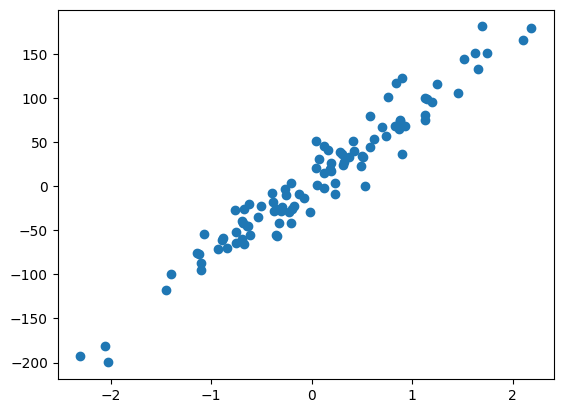

In [5]:
X, Y, coef = make_regression(n_samples= 100,
                             n_features= 1,
                             noise= 20,
                             coef= True,
                             random_state= 1)

plt.figure()
plt.scatter(x= X, y= Y)
plt.show()

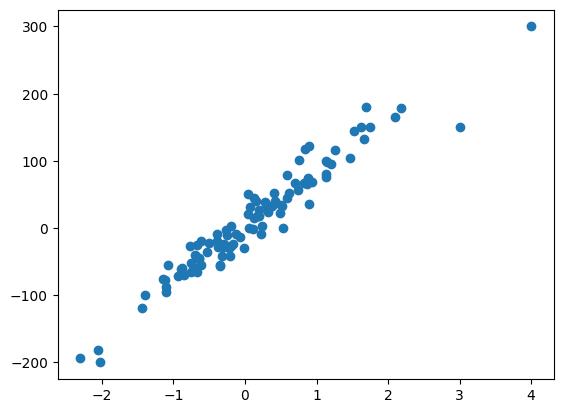

In [6]:
X, Y, coef = make_regression(n_samples= 100,
                             n_features= 1,
                             noise= 20,
                             coef= True,
                             random_state= 1)

X = np.vstack([X, np.array([[3], [4]])])
Y = np.hstack([Y, np.array([150, 300])])

plt.figure()
plt.scatter(x= X, y= Y)
plt.show()

In [7]:
import statsmodels.api as sm

In [8]:
model = sm.OLS(Y, sm.add_constant(X))
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1464.
Date:                Wed, 28 Jun 2023   Prob (F-statistic):           1.61e-61
Time:                        09:40:32   Log-Likelihood:                -452.71
No. Observations:                 102   AIC:                             909.4
Df Residuals:                     100   BIC:                             914.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2565      2.065      1.577      0.1

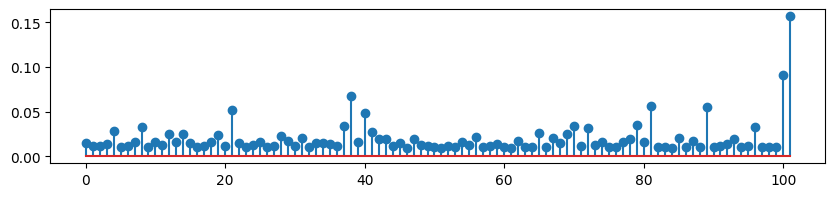

In [9]:
hat = result.get_influence().hat_matrix_diag

plt.figure(figsize= (10,2))
plt.stem(hat)
plt.show()

In [10]:
hat.sum()

2.0000000000000004

* 레버리지의 합 : 2

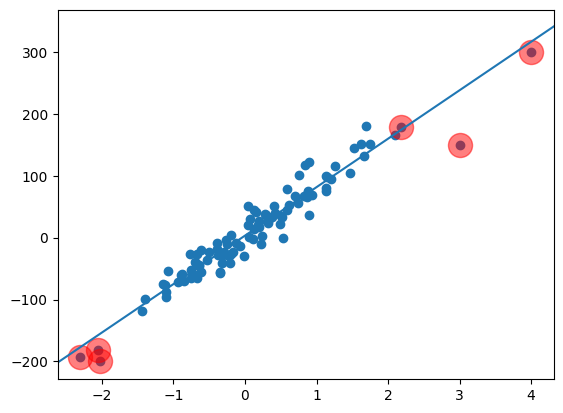

In [11]:
ax = plt.subplot()

ax.scatter(x= X, y= Y) # 원본 데이터

sm.graphics.abline_plot(model_results= result, ax= ax) # 모델 결정선

lev = hat > 0.05
plt.scatter(X[lev], Y[lev], s= 300, c= 'r', alpha= 0.5) # 레버리지(> 0.05)

plt.show()

In [12]:
np.argmax(hat)

101

In [13]:
model2 = sm.OLS(Y[:-1], sm.add_constant(X[:-1]))
result2 = model2.fit()

print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1267.
Date:                Wed, 28 Jun 2023   Prob (F-statistic):           3.09e-58
Time:                        09:42:58   Log-Likelihood:                -448.39
No. Observations:                 101   AIC:                             900.8
Df Residuals:                      99   BIC:                             906.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3539      2.070      1.620      0.1

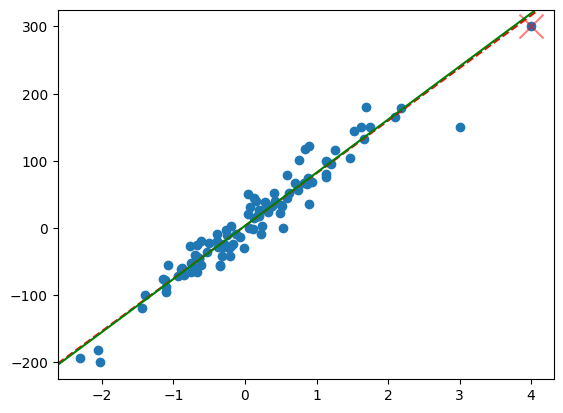

In [14]:
ax = plt.subplot()

ax.scatter(x= X, y= Y) # 원본 데이터

sm.graphics.abline_plot(model_results= result, ax= ax, c= 'r', linestyle= '--') # 모델 결정선
sm.graphics.abline_plot(model_results= result2, ax= ax, c= 'g') # 모델2 결정선

plt.scatter(X[-1], Y[-1], marker= 'x', s= 300, c= 'r', alpha= 0.5) # 레버리지(> 0.05)

plt.show()

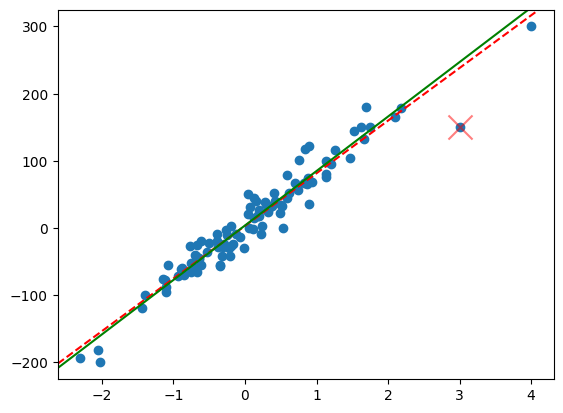

In [15]:
idx = np.array(list(range(100)) + [101])

model3 = sm.OLS(Y[idx], sm.add_constant(X[idx]))
result3 = model3.fit()

ax = plt.subplot()

ax.scatter(x= X, y= Y) # 원본 데이터

sm.graphics.abline_plot(model_results= result, ax= ax, c= 'r', linestyle= '--') # 모델 결정선
sm.graphics.abline_plot(model_results= result3, ax= ax, c= 'g') # 모델3 결정선

plt.scatter(X[100], Y[100], marker= 'x', s= 300, c= 'r', alpha= 0.5) # 레버리지(> 0.05)

plt.show()

In [16]:
# residual
result.resid

array([-10.87135546,   5.61669922, -18.76852921,  38.14532748,
        22.02187044,   0.45482484, -10.42302507,  23.44056613,
         6.50295824,  -4.17956285,   1.05573887,  19.48561026,
       -12.35171004, -37.42030963,  -4.3859175 ,  -0.44886658,
       -11.02294456, -31.10337898, -16.05844151,  26.34790916,
        -8.10422266,   4.3652458 ,  -5.96670773,   7.87747157,
         8.28357059,   8.80628694,  -6.38080612,  -4.35131737,
        14.58131582,  -8.7783273 ,  -1.8209663 ,   5.39646504,
         0.84826246,   3.1760233 ,  48.22253261,  13.56405426,
       -32.68227584,  44.99742283, -15.53375337,  -7.69378794,
        -2.26396861, -12.79450509,  -7.47872112,   6.7437676 ,
       -19.57469669,   0.65068382,  25.17298152, -11.44396145,
        -2.65142971,  -8.38669715, -28.60700754,   1.68527788,
        30.12504568,  -1.12010077,  11.43941856,   8.86639622,
        -1.64630153,  16.03153976, -44.69481527,  -4.89133809,
        16.19630312, -14.67675812,  29.71892753,   3.30

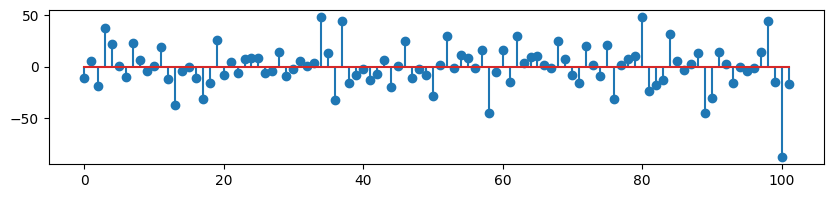

In [17]:
plt.figure(figsize= (10,2))
plt.stem(result.resid) # 잔차
plt.show()

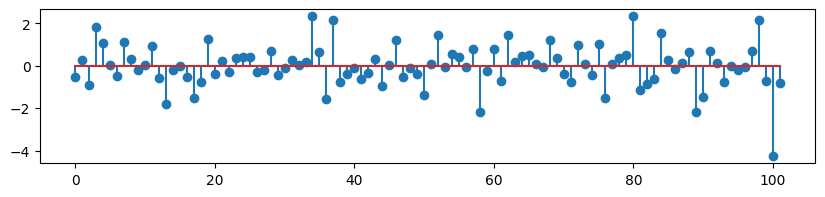

In [18]:
plt.figure(figsize= (10,2))
plt.stem(result.resid_pearson) # 표준화된 잔차
plt.show()

* 표준화된 잔차가 2~3보다 크면 잔차가 크다고 판단

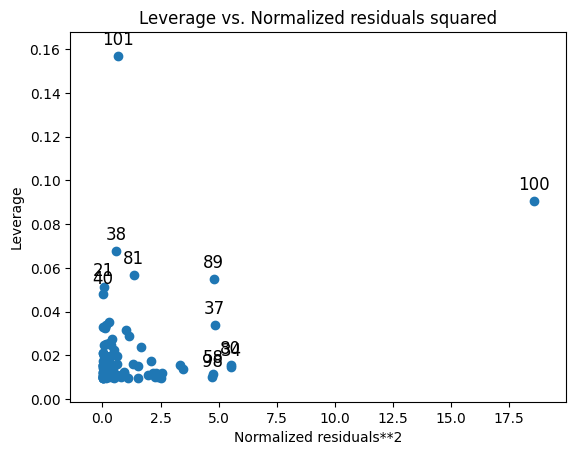

In [19]:
sm.graphics.plot_leverage_resid2(result)
plt.show()

In [20]:
cooks, p = result.get_influence().cooks_distance

fox = 4 / (len(Y) - result.get_influence().k_vars - 1)
fox

0.04040404040404041

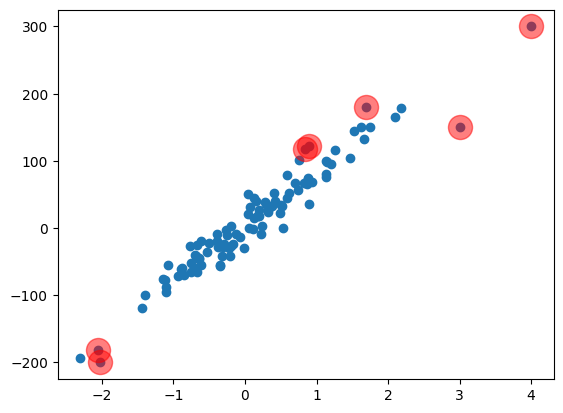

In [21]:
outliers = cooks > fox

plt.figure()
plt.scatter(x= X, y= Y)
plt.scatter(x= X[outliers], y= Y[outliers], s= 300, c= 'r', alpha= 0.5)
plt.show()

# Multicollinearity(다중공선성)

In [23]:
from statsmodels.datasets.longley import load_pandas

In [24]:
longley = load_pandas()
Y = longley.endog
X = longley.exog

df = pd.concat([Y, X], axis= 1)
df.head(3)

,TOTEMP,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
0,60323.0,83.0,234289.0,2356.0,1590.0,107608.0,1947.0
1,61122.0,88.5,259426.0,2325.0,1456.0,108632.0,1948.0
2,60171.0,88.2,258054.0,3682.0,1616.0,109773.0,1949.0


In [25]:
df.corr()

,TOTEMP,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
TOTEMP,1.000000,0.970899,0.983552,0.502498,0.457307,0.960391,0.971329
GNPDEFL,0.970899,1.000000,0.991589,0.620633,0.464744,0.979163,0.991149
GNP,0.983552,0.991589,1.000000,0.604261,0.446437,0.991090,0.995273
UNEMP,0.502498,0.620633,0.604261,1.000000,-0.177421,0.686552,0.668257
ARMED,0.457307,0.464744,0.446437,-0.177421,1.000000,0.364416,0.417245
POP,0.960391,0.979163,0.991090,0.686552,0.364416,1.000000,0.993953
YEAR,0.971329,0.991149,0.995273,0.668257,0.417245,0.993953,1.000000


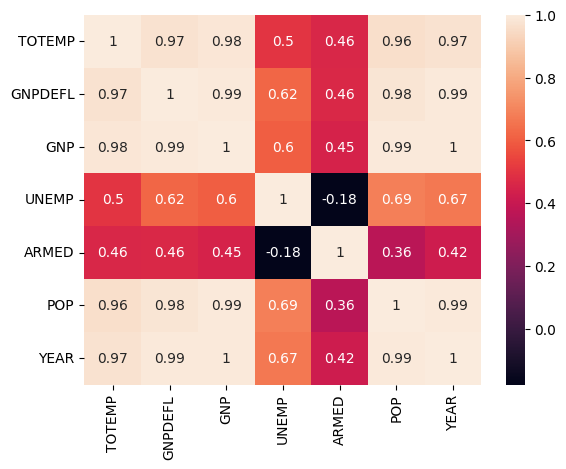

In [26]:
import seaborn as sns

plt.figure()
sns.heatmap(df.corr(), annot= True)
plt.show()

<Figure size 640x480 with 0 Axes>

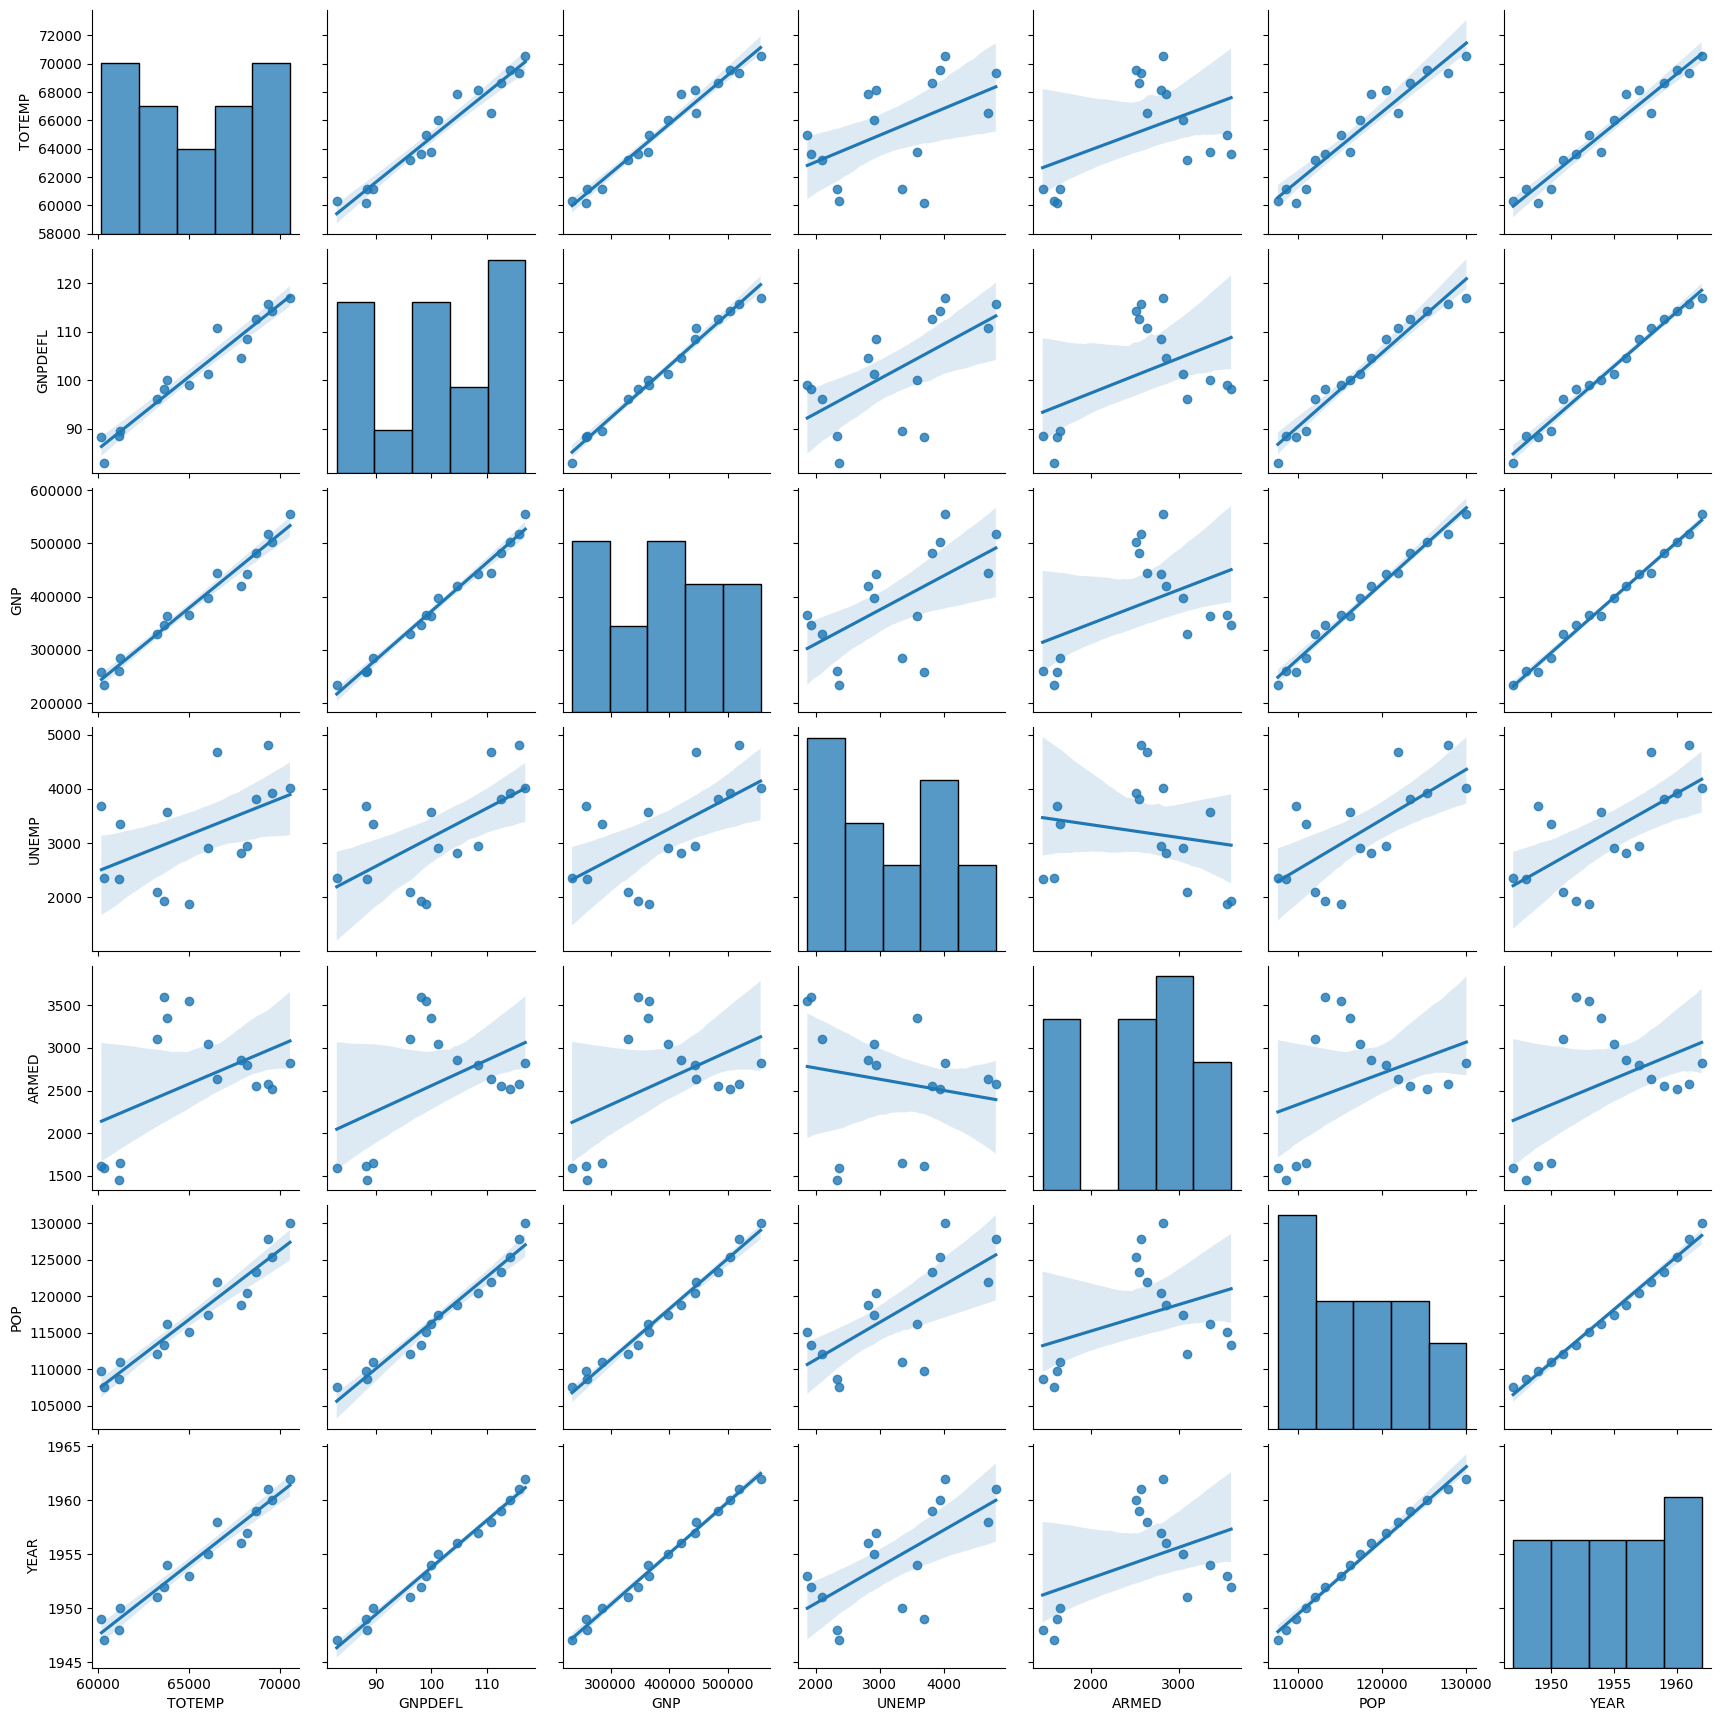

In [27]:
plt.figure()
sns.pairplot(df, kind= 'reg')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
df_train, df_test = train_test_split(df, test_size= 0.4, random_state= 1)

model = sm.OLS(df_train['TOTEMP'], df_train.iloc[:,1:])
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                 TOTEMP   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.587e+04
Date:                Wed, 28 Jun 2023   Prob (F-statistic):                    7.73e-07
Time:                        09:46:15   Log-Likelihood:                         -66.014
No. Observations:                   9   AIC:                                      144.0
Df Residuals:                       3   BIC:                                      145.2
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\ProgramData\anaconda3\envs\edu1\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [30]:
from sklearn.metrics import r2_score

In [31]:
pred = result.predict(df_test.iloc[:,1:])
r2 = r2_score(df_test['TOTEMP'], pred)
r2

0.9663885278269209

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
vif = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif

[12425.514335354637,
 10290.435436791722,
 136.2243535629104,
 39.98338558291202,
 101193.16199321792,
 84709.9504430369]

In [35]:
for col, v in zip(X.columns, vif) :
    print(col, v)

GNPDEFL 12425.514335354637
GNP 10290.435436791722
UNEMP 136.2243535629104
ARMED 39.98338558291202
POP 101193.16199321792
YEAR 84709.9504430369


In [36]:
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif.sort_values(by= 'VIF', ascending= False).round(2)

,Feature,VIF
4,POP,101193.16
5,YEAR,84709.95
0,GNPDEFL,12425.51
1,GNP,10290.44
2,UNEMP,136.22
3,ARMED,39.98


In [37]:
model2 = sm.OLS.from_formula('TOTEMP ~ scale(GNP) + scale(UNEMP) + scale(ARMED)',
                             data= df_train)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     76.71
Date:                Wed, 28 Jun 2023   Prob (F-statistic):           0.000133
Time:                        09:46:48   Log-Likelihood:                -68.631
No. Observations:                   9   AIC:                             145.3
Df Residuals:                       5   BIC:                             146.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       6.6e+04    221.861    297.489   

C:\ProgramData\anaconda3\envs\edu1\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [38]:
pred2 = result2.predict(df_test.loc[:,['GNP','UNEMP','ARMED']])
r2 = r2_score(df_test['TOTEMP'], pred2)
r2

0.9889103109315418

In [39]:
vif = pd.DataFrame()
vif['Feature'] = X.loc[:,['GNP','UNEMP','ARMED']].columns
vif['VIF'] = [variance_inflation_factor(X.loc[:,['GNP','UNEMP','ARMED']], i) for i in range(X.loc[:,['GNP','UNEMP','ARMED']].shape[1])]
vif.sort_values(by= 'VIF', ascending= False).round(2)

,Feature,VIF
0,GNP,51.96
1,UNEMP,22.08
2,ARMED,17.58


## Ex) Boston house price

In [40]:
df = pd.read_csv('./Data/boston.csv')
df.head(3)

,ID,TOWN,TOWNNO,TRACT,LON,LAT,x,y,MEDV,CMEDV,...,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.0,0.0,2011.0,-70.955,42.2550,338.73,4679.73,24.0,24.0,...,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,2.0,0.0,1.0,2021.0,-70.950,42.2875,339.23,4683.33,21.6,21.6,...,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,3.0,0.0,1.0,2022.0,-70.936,42.2830,340.37,4682.80,34.7,34.7,...,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [41]:
X = df.drop(['ID','MEDV','CMEDV','TOWN'], axis= 1)

vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif.sort_values(by= 'VIF', ascending= False)

,Feature,VIF
3,LAT,1.500200e+12
5,y,1.490765e+12
2,LON,5.191818e+06
4,x,4.834941e+06
11,RM,1.607521e+02
16,PTRATIO,1.577400e+02
10,NOX,1.252611e+02
15,TAX,6.792448e+01
1,TRACT,4.423565e+01
13,DIS,3.064329e+01
